# **Loan Prediction Project**
Dataset 7: Company X Loan History Data Set

###**Challenge Description**


Dream Housing Finance là một công ty tài chính chuyên cung cấp các khoản vay mua nhà. Công ty hoạt động trên khắp các khu vực đô thị, bán đô thị và nông thôn. Hiện tại, quy trình xét duyệt khoản vay dựa vào nhân viên và mất nhiều thời gian. Vì vậy, mục tiêu là tự động hóa quy trình xét duyệt bằng cách xây dựng một mô hình dự đoán khả năng khách hàng được chấp thuận khoản vay. Điều này sẽ giúp công ty tập trung vào các khách hàng tiềm năng.

Bộ dữ liệu chứa các thông tin nhân khẩu học và lịch sử vay vốn của những khách hàng trước đây của công ty.

Attribute Information:
1. Loan_ID: Unique Loan ID
2. Gender: Male/ Female
3. Married: Applicant married status (Y/N)
4. Dependents: Number of dependents
5. Education: Applicant Education (Graduate/ Under Graduate)
6. Self_Employed: Self-employed (Y/N)
7. ApplicantIncome: Applicant income
8. CoapplicantIncome: Coapplicant income
9. LoanAmount: Loan amount in thousands
10. Loan_Amount_Term: Term of a loan in months
11. Credit_History: credit history meets guidelines
12. Property_Area: Urban / Semi-Urban / Rural
13. Loan_Status: Loan approved (Y/N)


###**Workflow stages**

Solution được thực hiện qua 7 bước sau:
1. Problem definition.
2. Acquire data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

# **1. Problem Definition**

Dream Housing Finance muốn tự động hóa quy trình xét duyệt khoản vay dựa trên thông tin khách hàng. Mục tiêu của bài toán là xây dựng một mô hình dự đoán xem khách hàng có được duyệt khoản vay hay không.

**Xác định biến mục tiêu:**

- **Biến mục tiêu (target variable):** là biến muốn dự đoán hoặc giải thích dựa trên các biến đầu vào (biến độc lập hoặc đặc trưng - features).
- Biến mục tiêu của mô hình dự đoán nhóm xây dựng là: **Loan_Status**



#**2. Acquire data**

Import Libraries

In [ ]:
!pip install ace_tools

# === Import Libraries ===
# Core libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np
from scipy import stats

# Scikit-learn modules for data splitting, model selection, and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# Metrics for model evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
)

# Tools for model saving and loading
import joblib

# Visualization libraries for data interpretation and results presentation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_validate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Acquire Data

In [ ]:
df = pd.read_csv('company-x-loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Chuyển index của frame thành Loan_ID

In [ ]:
len(set(df['Loan_ID'])) == len(df)
df.set_index('Loan_ID', inplace = True)

## Analyze by describing data

Which features are available in the dataset?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


##Type of feature in the datasets

Xác định các cột là biến phân loại Categorical

**`Biến Categorical`** là những biến có các giá trị được phân loại thành các nhóm hoặc lớp rời rạc, thường không mang tính số học.

Các loại dữ liệu biến Categorical:
-  **Nominal** (không thể sắp xếp thứ tự): `Gender`,`Married`,`Self_Employed`, `Property_Area`, `Loan_Status`.
-  **Ordinal** (có thể sắp xếp thứ tự): `Education`, `Dependents`.

---
Xác định các cột là biến số Numerical

**`Biến Numerical`** là những biến có giá trị số học, thường được sử dụng để thực hiện các phép toán và phân tích thống kê.

Các loại dữ liệu biến Numerical:
- **Continuous** (liên tục): `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`.
- **Discrete** (rời rạc): `Loan_Amount_Term`, `Credit_History`


# **3. Wrangle, prepare, cleanse the data.**

Which features may contain blank, null, empty values?

<b> Xác định được những feature còn chứa giá trị null và cần xử lý

In [ ]:
null_list=[]
for column in df.columns:
    if df[column].isna().sum() > 0:
       null_list.append(column)
print(null_list)

['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


<b> Kiểm tra phân phối chuẩn cho từng cột

In [ ]:
# Hàm kiểm tra phân phối chuẩn cho từng cột
def check_normality(df):
    results = {}

    for column in df.select_dtypes(include=[np.number]).columns:  # Kiểm tra với các cột kiểu số
        print(f"\nKiểm tra phân phối chuẩn cho cột: {column}")

        # Kiểm tra phân phối chuẩn bằng test Shapiro-Wilk
        stat, p_value = stats.shapiro(df[column].dropna())
        print(f"Shapiro-Wilk test: stat={stat:.4f}, p-value={p_value:.4f}")

        # Nếu p-value < 0.05, có thể bác bỏ giả thuyết phân phối chuẩn
        if p_value > 0.05:
            print(f"{column} có thể tuân theo phân phối chuẩn.")
        else:
            print(f"{column} không tuân theo phân phối chuẩn.")

#         results[column] = p_value

    return results

# Kiểm tra phân phối chuẩn cho từng cột trong DataFrame
normality_results = check_normality(df)

# In kết quả kiểm tra
for column, p_value in normality_results.items():
    print(f"{column}: p-value = {p_value:.4f}")


Kiểm tra phân phối chuẩn cho cột: ApplicantIncome
Shapiro-Wilk test: stat=0.4713, p-value=0.0000
ApplicantIncome không tuân theo phân phối chuẩn.

Kiểm tra phân phối chuẩn cho cột: CoapplicantIncome
Shapiro-Wilk test: stat=0.4815, p-value=0.0000
CoapplicantIncome không tuân theo phân phối chuẩn.

Kiểm tra phân phối chuẩn cho cột: LoanAmount
Shapiro-Wilk test: stat=0.7675, p-value=0.0000
LoanAmount không tuân theo phân phối chuẩn.

Kiểm tra phân phối chuẩn cho cột: Loan_Amount_Term
Shapiro-Wilk test: stat=0.4776, p-value=0.0000
Loan_Amount_Term không tuân theo phân phối chuẩn.

Kiểm tra phân phối chuẩn cho cột: Credit_History
Shapiro-Wilk test: stat=0.4373, p-value=0.0000
Credit_History không tuân theo phân phối chuẩn.


**Xử lý các cột dữ liệu categorical**<br>
Nhóm tiến hành xử lý các dữ liệu null trong các cột categorical bằng cách thay thế bằng giá trị xuất hiện nhiều nhất của cột.

In [ ]:
mode_list = ['Gender','Married','Dependents', 'Self_Employed']
for column in mode_list:
    df[column].fillna(df[column].mode()[0],inplace=True)

<ipython-input-8-c1456484f3ef>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0],inplace=True)


**Xử lý các cột dữ liệu numerical**<br>
Do cả 3 cột dữ liệu cồn chứa giá trị null trong dataset đều **không tuân theo phân bố chuẩn**, nhóm tiến hành xử lý bằng cách thay bằng giá trị trung vị của cột.

In [ ]:
median_list=['LoanAmount','Loan_Amount_Term', 'Credit_History']
for column in median_list:
    df[column].fillna(df[column].median(),inplace=True)

<ipython-input-9-4a9127a5f55f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(),inplace=True)


In [ ]:
df['Loan_Status']=np.where(df['Loan_Status'] == 'Y',1,0)
df['Gender']=np.where(df['Gender'] == 'Male',1,0)
df['Education']=np.where(df['Education'] == 'Graduate',1,0)
df['Married']=np.where(df['Married'] == 'Yes',1,0)
df['Self_Employed']=np.where(df['Self_Employed'] == 'Yes',1,0)

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1


Encode các feature có nhiều hơn 2 giá trị: tách thành các feature ứng với các giá trị tương ứng

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False) # nếu báo lỗi thì thay sparse_output bằng sparse
df2 = pd.DataFrame (encoder.fit_transform(df[['Dependents', 'Property_Area']]))
# trả về tên của các features sau khi áp dụng biến đổi
df2.columns = encoder.get_feature_names_out(['Dependents', 'Property_Area'])
df.drop(['Dependents', 'Property_Area'], axis = 1, inplace = True)
df2.index = df.index
df2 = pd.concat([df, df2], axis=1)
df2

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,
LP001002,1,0,1,0,5849,0.0,128.0,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
LP001003,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
LP001005,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
LP001006,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
LP001008,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
LP002979,1,1,1,0,4106,0.0,40.0,180.0,1.0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
LP002983,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Scale dữ liệu về (0, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3 = scaler.fit_transform(df2.to_numpy())
df3 = pd.DataFrame(df3)
df3.columns = df2.columns
df3.index = df2.index
df3

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,
LP001002,1.0,0.0,1.0,0.0,0.070489,0.000000,0.172214,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
LP001003,1.0,1.0,1.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
LP001005,1.0,1.0,1.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
LP001006,1.0,1.0,0.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
LP001008,1.0,0.0,1.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0.0,0.0,1.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
LP002979,1.0,1.0,1.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
LP002983,1.0,1.0,1.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# **4. EDA**

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    float64
 1   Married                  614 non-null    float64
 2   Education                614 non-null    float64
 3   Self_Employed            614 non-null    float64
 4   ApplicantIncome          614 non-null    float64
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    float64
 10  Dependents_0             614 non-null    float64
 11  Dependents_1             614 non-null    float64
 12  Dependents_2             614 non-null    float64
 13  Dependents_3+            614 non-null    float64
 14  Property_Area_Rural

##**4.1. Bảng tương quan giữa các feature**



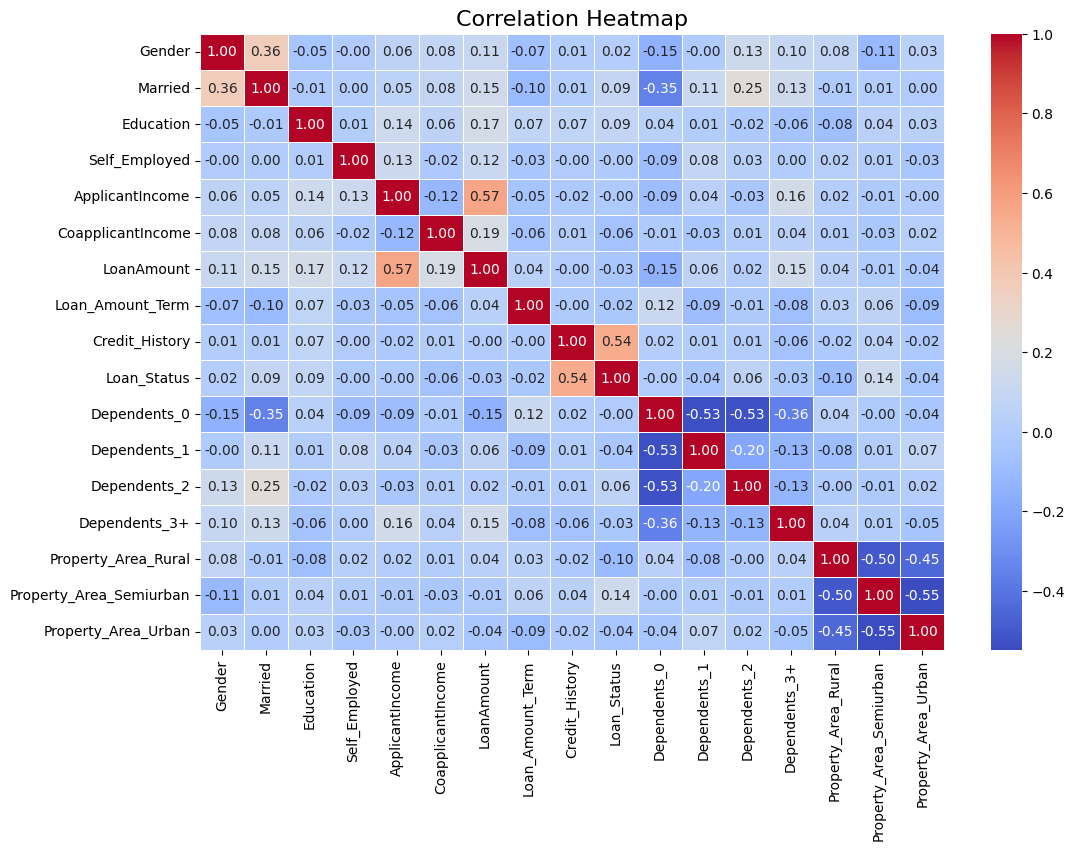

In [ ]:
corr = df3.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

**Từ bản đồ nhiệt (heatmap) này, có thể rút ra một số thông tin quan trọng về mối tương quan giữa các biến trong tập dữ liệu:**

***1. Các mối quan hệ mạnh mẽ:***

Loan_Status và Credit_History:
Có thể có tương quan mạnh (giá trị cao gần 1). Điều này cho thấy lịch sử tín dụng (Credit_History) là yếu tố quan trọng để xác định trạng thái khoản vay được chấp thuận hay không.
LoanAmount và ApplicantIncome:
Thường có một tương quan trung bình đến cao (giá trị > 0.5). Điều này hợp lý vì thu nhập cao hơn có thể liên quan đến các khoản vay lớn hơn.

***2. Các mối quan hệ yếu:***

Một số biến như Gender, Self_Employed, và các cột mã hóa từ Dependents có thể không có tương quan mạnh với Loan_Status (giá trị gần 0). Điều này cho thấy chúng ít ảnh hưởng đến khả năng chấp thuận khoản vay.
Property_Area:
Tương quan với Loan_Status có thể yếu hoặc không đáng kể. Điều này cho thấy khu vực tài sản có thể không phải là yếu tố quyết định chính.

***3. Tương quan nội bộ giữa các biến:***

Các biến liên quan đến thu nhập và số tiền vay (ApplicantIncome, LoanAmount) có thể có mối tương quan với nhau, cho thấy chúng có sự tương quan nội tại liên quan đến khả năng tài chính của người vay.


##**4.2. Biểu đồ phân phối các đặc điểm**


**1. Các biến nhân khẩu học (Demographic Variables)**

Assumption: Các yếu tố nhân khẩu học như giới tính, tình trạng hôn nhân, và số người phụ thuộc có thể ảnh hưởng đến khả năng trả nợ.

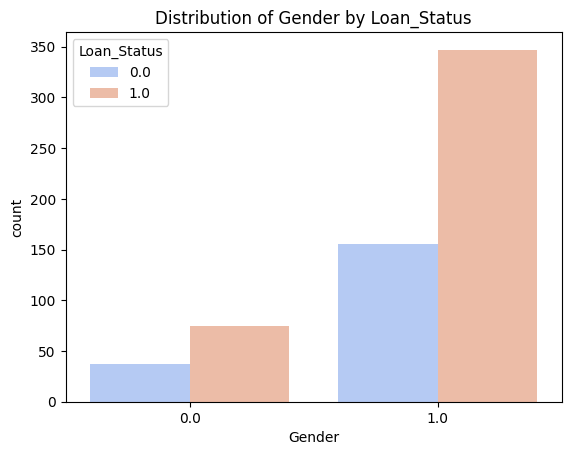

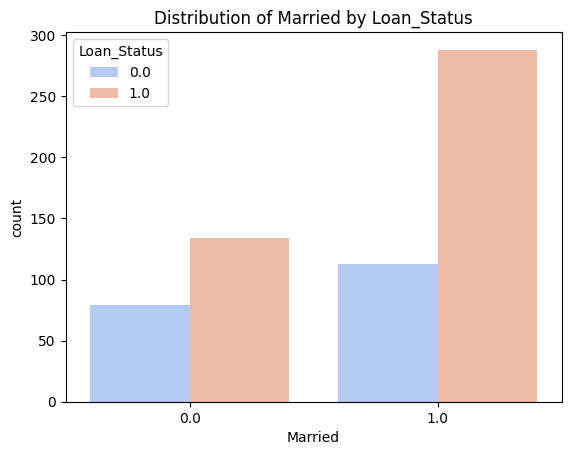

<ipython-input-16-8387ce568ed6>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df3, x=col, y='Loan_Status', ci=None, palette='coolwarm')
<ipython-input-16-8387ce568ed6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3, x=col, y='Loan_Status', ci=None, palette='coolwarm')


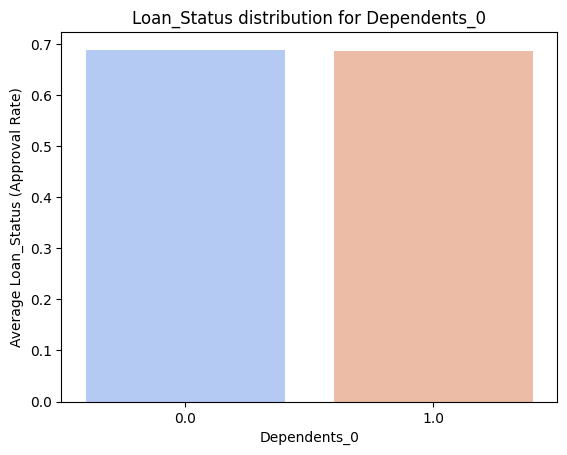

<ipython-input-16-8387ce568ed6>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df3, x=col, y='Loan_Status', ci=None, palette='coolwarm')
<ipython-input-16-8387ce568ed6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3, x=col, y='Loan_Status', ci=None, palette='coolwarm')


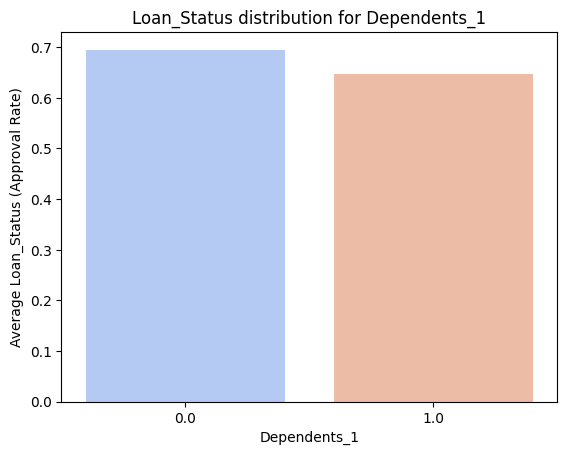

<ipython-input-16-8387ce568ed6>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df3, x=col, y='Loan_Status', ci=None, palette='coolwarm')
<ipython-input-16-8387ce568ed6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3, x=col, y='Loan_Status', ci=None, palette='coolwarm')


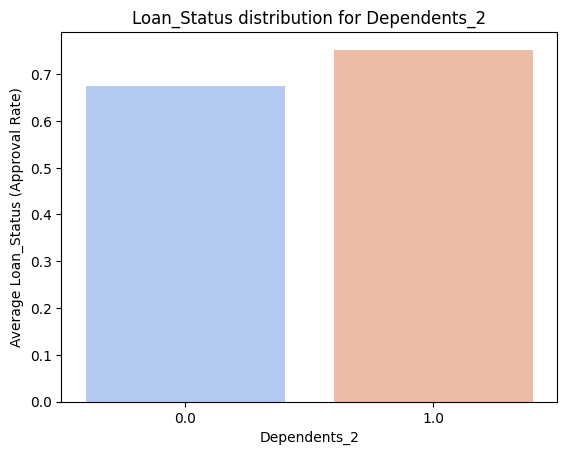

<ipython-input-16-8387ce568ed6>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df3, x=col, y='Loan_Status', ci=None, palette='coolwarm')
<ipython-input-16-8387ce568ed6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3, x=col, y='Loan_Status', ci=None, palette='coolwarm')


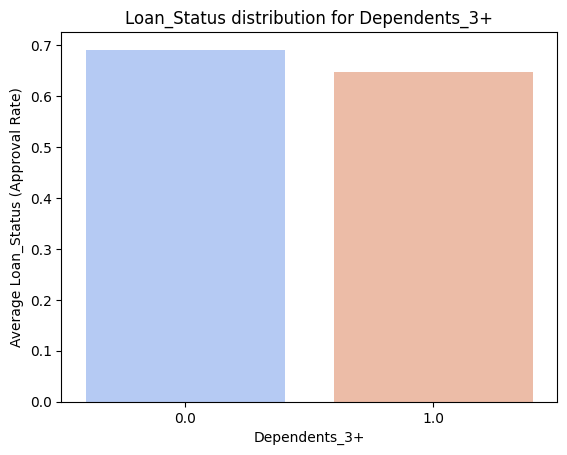

In [ ]:
# Bar plot for demographic variables
for col in ['Gender', 'Married']:
    sns.countplot(data=df3, x=col, hue='Loan_Status', palette='coolwarm')
    plt.title(f"Distribution of {col} by Loan_Status")
    plt.show()

# One-hot encoded Dependents
dependents_cols = [col for col in df3.columns if 'Dependents_' in col]
for col in dependents_cols:
    sns.barplot(data=df3, x=col, y='Loan_Status', ci=None, palette='coolwarm')
    plt.title(f"Loan_Status distribution for {col}")
    plt.xlabel(col)
    plt.ylabel("Average Loan_Status (Approval Rate)")
    plt.show()

**Result**

Gender: Mặc dù số lượng nam giới apply hồ sơ vay nhiều hơn hẳn so với nữ giới nhưng không có sự khác biệt rõ ràng về tỷ lệ chấp thuận khoản vay giữa nam và nữ.

Married: Người đã kết hôn có tỷ lệ được chấp thuận cao hơn.

Dependents: Nhóm không có người phụ thuộc có tỷ lệ được chấp thuận cao nhất.

**Conclusion:**

Giữ lại: Married và Dependents để đưa vào mô hình.

Loại bỏ: Gender, do không có mối quan hệ đáng kể.

**2. Các biến về tài chính (Financial Variables)**

***Assumptions:***
Thu nhập và số tiền vay là yếu tố chính quyết định khả năng trả nợ.


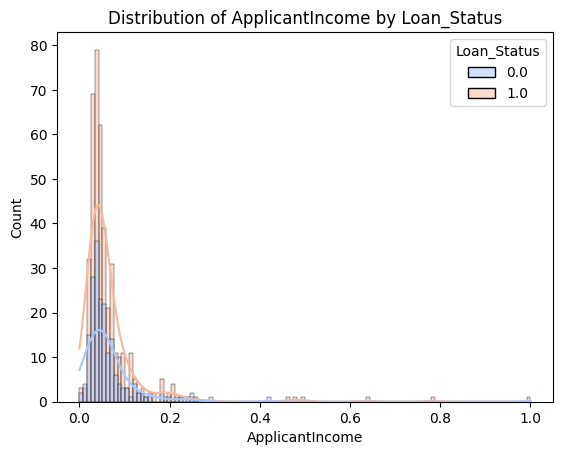

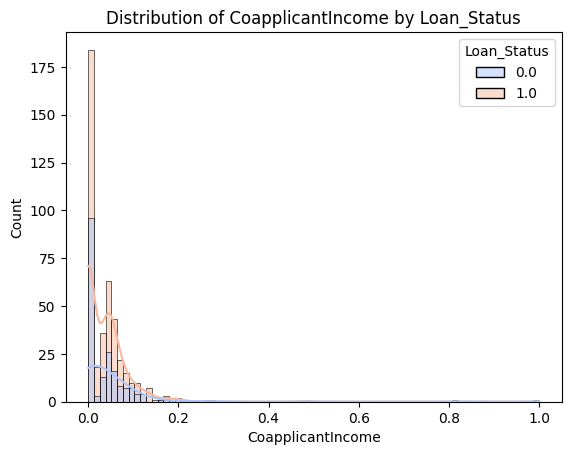

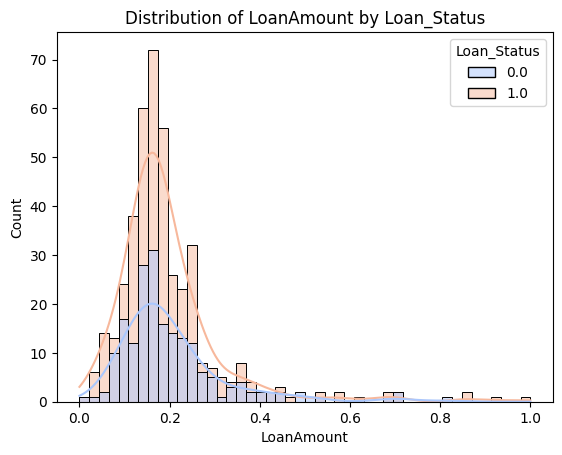

<ipython-input-17-629e9dd4cace>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df3, x='Loan_Status', y=col, palette='coolwarm')


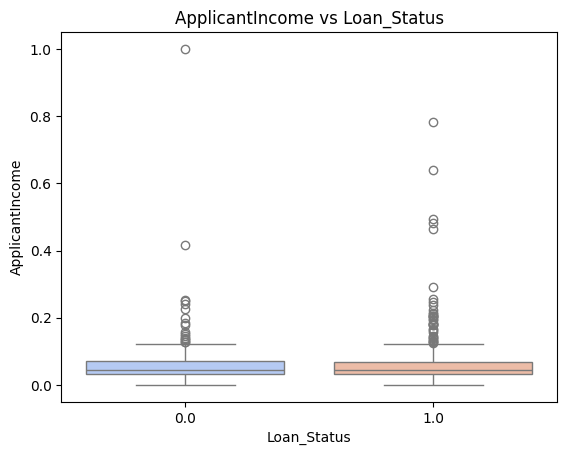

<ipython-input-17-629e9dd4cace>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df3, x='Loan_Status', y=col, palette='coolwarm')


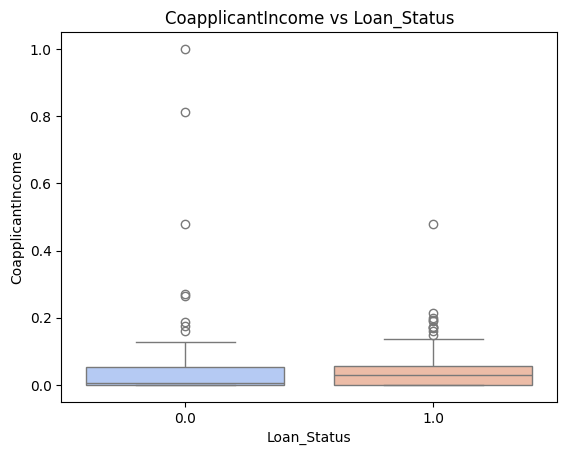

<ipython-input-17-629e9dd4cace>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df3, x='Loan_Status', y=col, palette='coolwarm')


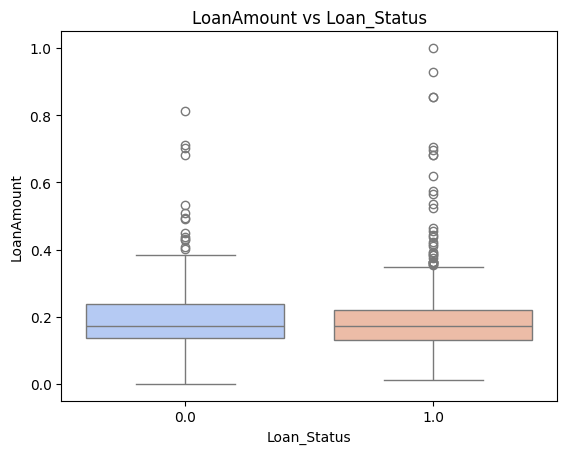

In [ ]:
# Histogram for income and loan amount
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    sns.histplot(data=df3, x=col, hue='Loan_Status', kde=True, palette='coolwarm')
    plt.title(f"Distribution of {col} by Loan_Status")
    plt.show()

# Boxplot for each financial variable
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    sns.boxplot(data=df3, x='Loan_Status', y=col, palette='coolwarm')
    plt.title(f"{col} vs Loan_Status")
    plt.show()


**Results:**

- ***ApplicantIncome***: Thu nhập cao không đảm bảo việc được chấp thuận khoản vay.
Thu nhập ổn định ở mức trung bình có vẻ dễ được chấp thuận hơn.

- ***CoapplicantIncome***: Thu nhập của người đồng vay có thể không phải yếu tố quan trọng trong quyết định chấp thuận khoản vay.

- ***LoanAmount***: Số tiền vay là một yếu tố quan trọng, nhưng có thể bị ảnh hưởng bởi các yếu tố khác (như thu nhập hoặc lịch sử tín dụng).
- Nhóm được chấp thuận thường có thu nhập cao hơn và khoản vay thấp hơn.

**Conclusion:**

***Giữ lại:*** ApplicantIncome, LoanAmount.

***Loại bỏ:*** CoapplicantIncome.

**3. Các biến về lịch sử tín dụng và thông tin khoản vay**

***Assumptions:***
Lịch sử tín dụng và thông tin khoản vay là yếu tố quan trọng trong quyết định khoản vay.


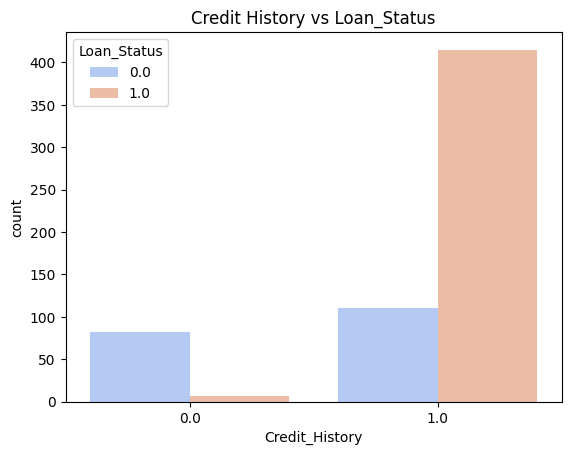

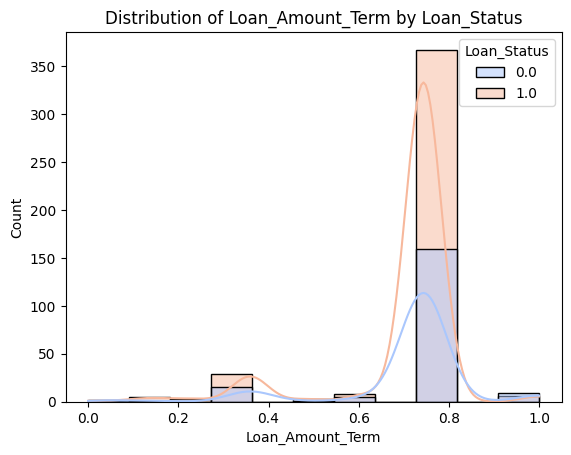

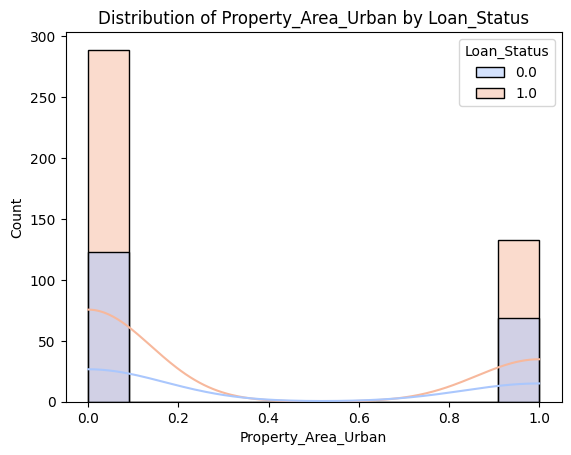

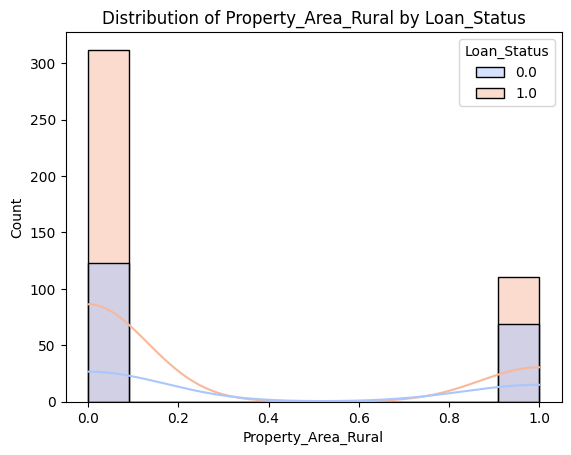

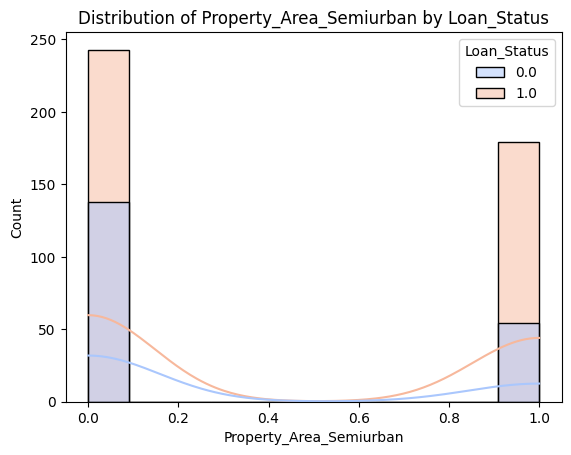

In [ ]:
# Credit History distribution
sns.countplot(data=df3, x='Credit_History', hue='Loan_Status', palette='coolwarm')
plt.title("Credit History vs Loan_Status")
plt.show()

# Loan Term and Property Area
for col in ['Loan_Amount_Term', 'Property_Area_Urban', 'Property_Area_Rural', 'Property_Area_Semiurban']:
    sns.histplot(data=df3, x=col, hue='Loan_Status', kde=True, palette='coolwarm')
    plt.title(f"Distribution of {col} by Loan_Status")
    plt.show()


**Result**

* **Credit_History**

  - Credit_History = 1.0 (có lịch sử tín dụng tốt): Nhóm này chiếm phần lớn trong tập dữ liệu và có tỷ lệ chấp thuận khoản vay rất cao.
  - Credit_History = 0.0 (không có lịch sử tín dụng tốt): Nhóm này có tỷ lệ không được chấp thuận cao hơn đáng kể.

* **Loan_Amount_Term**
  - Hầu hết các khoản vay đều có thời hạn chuẩn (khoảng 0.8 sau khi chuẩn hóa, tương ứng với 360 tháng).
  - Không có sự khác biệt rõ ràng giữa tỷ lệ chấp thuận và từ chối theo thời hạn vay.

* **Property_Area**

  - ***Property_Area_Rural:*** Tỷ lệ không được chấp thuận cao hơn so với tỷ lệ được chấp thuận. Các khoản vay ở khu vực nông thôn có ít khả năng được chấp thuận hơn.

  - ***Property_Area_Semiurban:*** Có tỷ lệ được chấp thuận cao nhất trong tất cả các khu vực. Semiurban là khu vực có mức độ chấp thuận đáng kể.

  - ***Property_Area_Urban:*** Tỷ lệ được và không được chấp thuận khá cân bằng. Khu vực đô thị không có sự khác biệt lớn trong quyết định chấp thuận khoản vay.

**Conclusion**
- **Giữ lại:** Credit_History, Property_Area.

- **Loại bỏ:** Loan_Amount_Term.


##**4.3. Biểu đồ với biến Self_Employed**


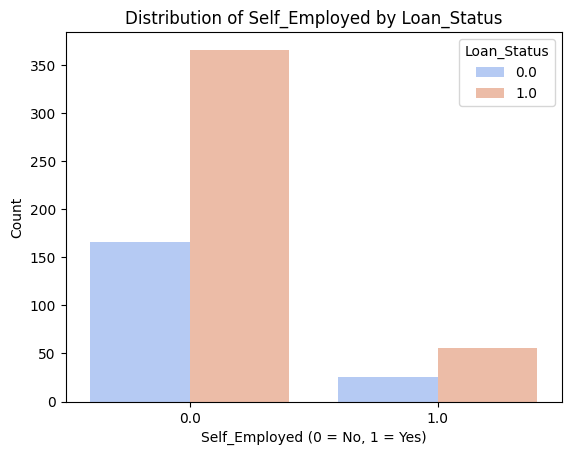

In [ ]:
# Bar plot for Self_Employed distribution with Loan_Status
sns.countplot(data= df3, x='Self_Employed', hue='Loan_Status', palette='coolwarm')
plt.title("Distribution of Self_Employed by Loan_Status")
plt.xlabel("Self_Employed (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

**Results (Kết quả):**

Self_Employed = 0 (Không tự kinh doanh):

- Nhóm không tự kinh doanh chiếm phần lớn trong tập dữ liệu.
- Tỷ lệ được chấp thuận khoản vay cao hơn nhóm tự kinh doanh.

Self_Employed = 1 (Tự kinh doanh):

- Nhóm này có số lượng hồ sơ ít hơn đáng kể.
- Tỷ lệ được chấp thuận thấp hơn, điều này có thể do các tổ chức tài chính đánh giá rủi ro cao hơn với người tự kinh doanh.

**Conclusion (Kết luận):**

Giữ lại biến Self_Employed:

Mặc dù biến này có sự chênh lệch giữa các nhóm, nhưng nhóm tự kinh doanh (Self_Employed = 1) có đặc điểm rõ ràng về tỷ lệ không được chấp thuận.
Biến này có thể hữu ích trong mô hình dự đoán vì nó ảnh hưởng đến trạng thái khoản vay.

 ***Loại bỏ các feature không đưa vào mô hình: Loan_Amount_Term, CoapplicantIncome, Gender***

In [ ]:
df3.drop(columns=['Loan_Amount_Term', 'CoapplicantIncome', 'Gender'], errors='ignore')


,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,
LP001002,0.0,1.0,0.0,0.070489,0.172214,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
LP001003,1.0,1.0,0.0,0.054830,0.172214,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
LP001005,1.0,1.0,1.0,0.035250,0.082489,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
LP001006,1.0,0.0,0.0,0.030093,0.160637,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
LP001008,0.0,1.0,0.0,0.072356,0.191027,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0.0,1.0,0.0,0.034014,0.089725,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
LP002979,1.0,1.0,0.0,0.048930,0.044863,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
LP002983,1.0,1.0,0.0,0.097984,0.353111,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# **5. Model Development**


## **5.1. Splitting the Dataset**

**Chia tập train - validation - test theo tỉ lệ 8-1-1**
- Chia dữ liệu thành tập train0 và test bằng hàm train_test_split theo tỷ lệ 80:20 để thực hiện chuẩn hóa dữ liệu trên từng phần; được 2 tập dữ liệu: train_val: 90%, test: 10%
- Chia dữ liệu tập train_val thành tập train và val (validation) theo tỷ lệ train (80% tổng dữ liệu), val (10% tổng dữ liệu)

In [ ]:
# Lấy X (features) và y (target)
X = df3.drop(columns=["Loan_Status"])  # Features
y = df3["Loan_Status"]                 # Target

# Bước 1: Chia dữ liệu thành 90% train+validation và 10% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# Bước 2: Chia 90% train+validation thành 80% train và 10% validation (tương đương 8:1 với tổng dữ liệu)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1111, random_state=42, stratify=y_train_val
)

# Kiểm tra kích thước các tập
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (490, 16) (490,)
Validation set shape: (62, 16) (62,)
Test set shape: (62, 16) (62,)


## **5.2. Model selection**

Đây là bài toán **phân loại nhị phân (binary classification)**, với mục tiêu dự đoán **`Loan_Status`** (1: Approved, 0: Not Approved).

Dữ liệu được chia thành biến đầu vào (features) và biến mục tiêu (target).
Với bài toán phân loại giám sát, các mô hình tiềm năng bao gồm:
1. **Logistic Regression:** Mô hình đơn giản, hiệu quả và dễ diễn giải.
2. **Decision Tree:** Mô hình cây quyết định, dễ hiểu nhưng có thể bị overfitting.
3. **Random Forest:** Kết hợp nhiều cây quyết định để giảm overfitting và tăng độ chính xác.
4. **Gradient Boosting:** Kỹ thuật tăng cường độ chính xác bằng cách tối ưu hóa tuần tự.
5. **Naive Bayes classifier:** Lợi thế hơn các thuật toán khác với thiết kế đơn giản, nhanh, đáng tin cậy và chính xác trong 1 số trường hợp.

6. **KNN or k-Nearest Neighbors:** Một trong những thuật toán supervised-learning đơn giản nhất. Mọi tính toán được thực hiện khi nó cần dự đoán kết quả của dữ liệu mới.

7. **Support Vector Machines:** Một trong những thuật toán phổ biến nhất, được sử dụng cho các bài toán Phân loại cũng như Hồi quy, có khả năng thích ứng cao.

## **5.3. Selected Features**

Từ `df3`, các biến đầu vào gồm:

Numerical Variables:
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* Loan_Amount_Term
* Credit_History

Categorical Variables (One-Hot Encoded):
* Gender, Married, Education, Self_Employed
* Dependents_0, Dependents_1, Dependents_2,Dependents_3+
* Property_Area_Rural, Property_Area_Semiurban, Property_Area_Urban

Target variable: Loan_Status.

## **5.4. Model Fitting**


### **Baseline Model (Logistic Regression)**


Baseline Model (Logistic Regression) là chuẩn ban đầu để so sánh với các mô hình phức tạp hơn. Được huấn luyện trên **train set** và đánh giá trên **validation set.**

1. **Thiết Lập Tiêu Chuẩn (Benchmark)**:

Trả lời câu hỏi: "Mô hình phức tạp có thực sự cần thiết không?"

Ví dụ: Nếu Logistic Regression (Baseline Model) đạt hiệu suất 85%, các mô hình như Random Forest hoặc SVM cần vượt qua mức này để chứng minh giá trị.
2. **Kiểm Tra Dữ Liệu:**
- Dữ liệu có đủ chất lượng để giải bài toán không?
- Bài toán có quá nhiễu hoặc quá phức tạp không?
- Nếu Baseline Model đạt hiệu suất rất thấp, đó có thể là dấu hiệu dữ liệu không đủ tốt, cần tiền xử lý lại hoặc điều chỉnh thiết kế bài toán.
3. **Công cụ phát hiện lỗi dữ liệu**

Baseline Model hoạt động như một công cụ kiểm tra nhanh:
- Mất cân bằng dữ liệu.
- Các vấn đề trong tiền xử lý, như mã hóa sai hoặc thiếu dữ liệu.


In [ ]:
# Huấn luyện baseline model trên train set
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

# Đánh giá trên validation set
y_pred_val = baseline_model.predict(X_val)
y_prob_val = baseline_model.predict_proba(X_val)[:, 1]

print("Baseline Model Metrics on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_val):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_val):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_val):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_prob_val):.4f}")


Baseline Model Metrics on Validation Set:
Accuracy: 0.7724
Precision: 0.7692
Recall: 0.9524
F1-Score: 0.8511
ROC-AUC: 0.7109


**Đánh giá chất lượng của Baseline Model (Logistic Regression):**
1. **Baseline Model đạt hiệu suất khá tốt**, đặc biệt với F1-Score (0.8511) và Recall (0.9524). Điều này cho thấy Logistic Regression đã hoạt động ổn định và có khả năng giải quyết bài toán.
2.  **Có dấu hiệu mất cân bằng:** Dựa vào Recall cao của lớp 1 và ROC-AUC thấp, mô hình Baseline đang ưu tiên lớp chiếm ưu thế (Approved) và bỏ qua lớp thiểu số.

==> Cần xử lý mất cân bằng: Để cải thiện khả năng dự đoán lớp thiểu số (Not Approved), áp dụng các phương pháp như SMOTE (Oversampling) hoặc Undersampling trên train set.
3.   Để cải thiện khả năng phân biệt giữa các lớp (**ROC-AUC: 0.7128**), **các mô hình phức tạp hơn như Random Forest hoặc Gradient Boosting sẽ được thử nghiệm.** Quá trình này sẽ sử dụng Cross-Validation và đánh giá bằng các chỉ số như F1-Score và ROC-AUC để đảm bảo mô hình tối ưu hóa hiệu suất tổng thể.

### **Xử lí cân bằng dữ liệu**

Tiến hành xử lý cân bằng dữ liệu bằng phương pháp SMOTE (Oversampling)

**SMOTE (Oversampling)**

- SMOTE **giữ nguyên dữ liệu gốc của lớp chiếm ưu thế (1: Approved)** mà chỉ tạo thêm dữ liệu cho lớp thiểu số (0: Not Approved).
- SMOTE giúp mô hình **có thêm nhiều dữ liệu từ lớp thiểu số, cải thiện khả năng học** các đặc trưng quan trọng của lớp này.
- **Giảm rủi ro overfitting:** So với duplicating (lặp lại dữ liệu lớp thiểu số), SMOTE tạo dữ liệu mới bằng cách nội suy giữa các điểm dữ liệu hiện có, giảm nguy cơ mô hình học thuộc.

In [ ]:
# Áp dụng SMOTE trên train set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Kiểm tra phân phối lớp sau SMOTE
print("Original train set class distribution:")
print(y_train.value_counts())
print("\nBalanced train set class distribution:")
print(pd.Series(y_train_balanced).value_counts())

Original train set class distribution:
Loan_Status
1.0    336
0.0    154
Name: count, dtype: int64

Balanced train set class distribution:
Loan_Status
1.0    336
0.0    336
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


### **Fit các mô hình đã chọn**

In [ ]:
# Định nghĩa danh sách các mô hình cần thử nghiệm
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# Thiết lập k-fold cross-validation với 5 tập con
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Tạo dictionary để lưu kết quả của từng mô hình
results = []

## **5.5. Final Model Selection**


### **Cross-Validation**

**Lựa chọn các metrics để đánh giá mô hình:**

Đối với bài toán Loan_Status (1: Approved, 0: Not Approved), các chỉ số đánh giá hiệu suất cần tập trung vào:
- **F1-Score:** Cân bằng giữa ***Precision (giảm duyệt nhầm)*** và ***Recall (tránh bỏ sót các khoản vay đáng được phê duyệt)***, phù hợp khi cả hai mục tiêu đều quan trọng.
  - **Precision** cần thiết để hạn chế phê duyệt sai các khoản vay không đủ điều kiện, giảm rủi ro tài chính.
  - **Recall** đảm bảo phục vụ đúng các khách hàng đủ điều kiện, cải thiện trải nghiệm người dùng.
- **ROC-AUC:** Đánh giá khả năng phân biệt tổng thể giữa hai lớp, đặc biệt hữu ích khi dữ liệu có mất cân bằng.

**Dựa trên các mục tiêu, lựa chọn mô hình với F1-Score và ROC-AUC cao nhất để đảm bảo hiệu quả cân bằng giữa hai lớp.**

In [ ]:
# Lặp qua từng mô hình trong danh sách và thực hiện cross-validation
for name, model in models.items():
    print(f"Evaluating {name}...")

# Sử dụng cross_validate để tính toàn bộ chỉ số
    scoring = {
        "accuracy": make_scorer(accuracy_score),
        "precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score),
        "f1": make_scorer(f1_score),
        "roc_auc": "roc_auc"
    }

    cv_results = cross_validate(
        model, X_train, y_train, cv=kf, scoring=scoring, return_train_score=False
    )
# Lưu kết quả trung bình của từng chỉ số
    results.append({
        "Model": name,
        "F1-Score Mean": cv_results["test_f1"].mean(),
        "ROC-AUC Mean": cv_results["test_roc_auc"].mean()
    })

Evaluating Logistic Regression...
Evaluating Naive Bayes...
Evaluating k-NN...
Evaluating SVM...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...


### **Hiển thị kết quả Cross-Validation và lựa chọn model**

Cross-Validation Results:
                 Model  F1-Score Mean  ROC-AUC Mean
0  Logistic Regression       0.873732      0.759480
1          Naive Bayes       0.863920      0.746933
2                 k-NN       0.827460      0.685487
3                  SVM       0.873732      0.752191
4        Decision Tree       0.789137      0.687361
5        Random Forest       0.849912      0.784391
6    Gradient Boosting       0.848693      0.730875


<ipython-input-45-5d50f40e6240>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=results_df, x="F1-Score Mean", y="Model", palette="viridis")


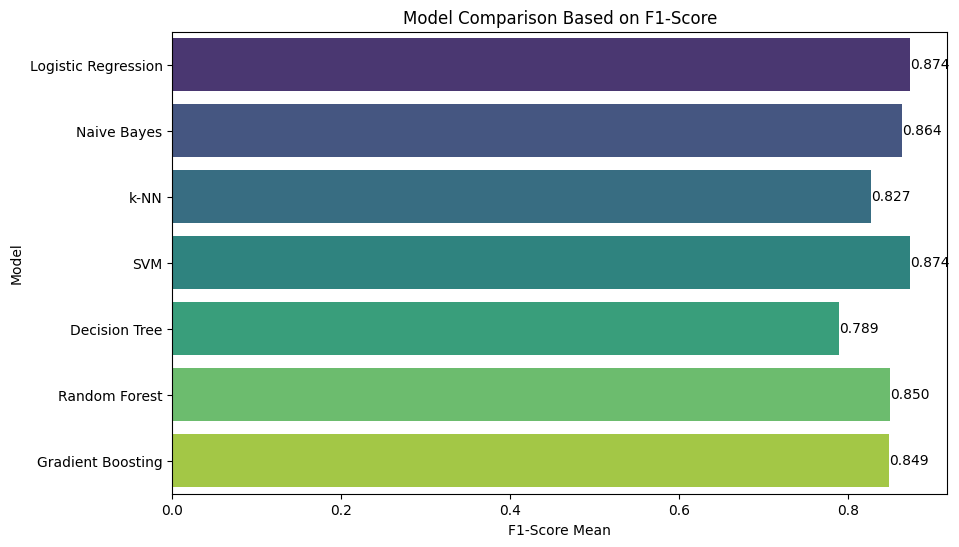

In [ ]:
# Chuyển kết quả thành DataFrame
results_df = pd.DataFrame(results)
print("Cross-Validation Results:")
print(results_df)

# Trực quan hóa kết quả F1-Score
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=results_df, x="F1-Score Mean", y="Model", palette="viridis")
plt.title("Model Comparison Based on F1-Score")
plt.xlabel("F1-Score Mean")
plt.ylabel("Model")
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.3f")

plt.show()


**Đánh giá hiệu suất các mô hình:**

**1. Hiệu suất tổng quan (Dựa trên F1-Score Mean):**
- SVM đạt F1-Score Mean cao nhất (0.861), cho thấy nó có khả năng cân bằng tốt giữa Precision và Recall.
- Logistic Regression gần sát (0.854), duy trì vai trò baseline mạnh.
- Naive Bayes, Random Forest, và Gradient Boosting có F1-Score Mean khá tốt, lần lượt là 0.846, 0.836, và 0.828.
- Các mô hình như k-NN (0.796) và Decision Tree (0.769) thấp hơn rõ rệt về F1-Score.

**2. ROC-AUC Mean (Khả năng phân biệt lớp):**
- Random Forest đạt ROC-AUC Mean cao nhất (0.776), vượt qua Logistic Regression (0.734) và Gradient Boosting (0.739).
- SVM có ROC-AUC (0.720) thấp hơn Random Forest nhưng vẫn cạnh tranh.
- Naive Bayes, k-NN, và Decision Tree có ROC-AUC thấp hơn đáng kể, lần lượt là 0.707, 0.653, và 0.652.

**Kết luận: SVM sẽ được chọn làm mô hình tối ưu để triển khai cho bài toán Loan_Status.**
- SVM đạt F1-Score: 0.861 (cao nhất), Recall: 0.988 (cao nhất), đảm bảo cân bằng Precision và Recall, phù hợp với mục tiêu bài toán dự đoán Loan_Status (tránh bỏ sót và hạn chế phê duyệt sai).
- Mặc dù ROC-AUC của Random Forest cao nhất (0.776), SVM vẫn duy trì mức khá (0.720), đủ để phân biệt giữa hai lớp. Nếu cần kiểm tra thêm, Random Forest có thể được giữ làm mô hình phụ để so sánh hiệu suất trên dữ liệu triển khai thực tế.


## **5.6. Hyperparameter Tuning (Tối ưu hóa tham số)**
Sau khi xác định mô hình tốt nhất: **SVM**, bước này tìm các tham số tối ưu để cải thiện hiệu suất của mô hình đó.

**1. Tham số cần điều chỉnh (param_grid):**
- C: Quyết định xem mô hình có nghiêm khắc hay dễ tính với các lỗi. Càng lớn, mô hình càng nghiêm khắc.
- gamma: Quyết định mô hình chú ý tới dữ liệu ở gần hay xa.
- kernel: Giúp biến dữ liệu phức tạp thành dạng dễ hiểu hơn.

**2. Thử các tham số khác nhau với RandomizedSearchCV:**
- Chọn ra tham số tốt nhất bằng cách thử nghiệm một số tổ hợp ngẫu nhiên (50 lần) trong danh sách tham số.
- Nếu thử tất cả các tổ hợp thì mất rất nhiều thời gian, RandomizedSearchCV giúp tiết kiệm thời gian.
- Cross-validation (cv=5): Chia dữ liệu thành 5 phần, huấn luyện 4 phần và kiểm tra 1 phần, làm đi làm lại để đảm bảo kết quả đáng tin cậy.


In [ ]:
# Chọn mô hình tốt nhất (SVM được chọn làm mô hình tối ưu)
best_model_name = "SVM"
print(f"Best Model Selected: {best_model_name}")

# Khởi tạo mô hình SVM và định nghĩa không gian tham số
model = SVC(probability=True, random_state=42)
param_grid = {
    "C": [0.1, 1, 10, 100],  # Thử nghiệm nhiều giá trị C
    "gamma": [0.01, 0.1, 1, 'scale', 'auto'],  # Thử gamma 'scale' và 'auto'
    "kernel": ["linear", "rbf", "poly"],  # Loại bỏ 'sigmoid' vì thường kém hiệu quả
}

# Tìm kiếm tham số tối ưu bằng RandomizedSearchCV
search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=50,  # Số lần thử nghiệm
    cv=5,  # 5-fold cross-validation trên train set
    scoring="f1",  # Tối ưu dựa trên F1-Score
    random_state=42,
    n_jobs=-1  # Chạy đa luồng để tăng tốc độ
)

# Huấn luyện mô hình trên train set
search.fit(X_train, y_train)

# Lấy mô hình tốt nhất sau khi tìm kiếm
best_model = search.best_estimator_
print("Best Hyperparameters:", search.best_params_)

Best Model Selected: SVM
Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}


**Đánh giá hiệu suất mô hình trên tập Validation**

In [ ]:
y_pred_val = best_model.predict(X_val)
y_prob_val = best_model.predict_proba(X_val)[:, 1]

print("Validation Set Metrics:")
print(classification_report(y_val, y_pred_val))

print("Additional Metrics on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_val):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_val):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_val):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_prob_val):.4f}")

Validation Set Metrics:
              precision    recall  f1-score   support

         0.0       0.91      0.53      0.67        19
         1.0       0.82      0.98      0.89        43

    accuracy                           0.84        62
   macro avg       0.87      0.75      0.78        62
weighted avg       0.85      0.84      0.82        62

Additional Metrics on Validation Set:
Accuracy: 0.8387
Precision: 0.8235
Recall: 0.9767
F1-Score: 0.8936
ROC-AUC: 0.8017


**Đánh giá:**
- F1-Score và ROC-AUC đều tăng (ROC-AUC 0.8017 so với 0.7109), cho thấy mô hình đã tối ưu hóa hiệu suất tốt hơn so với Baseline.
- Lớp thiểu số đã được nhận diện tốt hơn: Recall và F1-Score của lớp 0 tăng lên, dù chưa đạt mức tối ưu.
Recall lớp 0 (0.53 so với rất thấp trước đó)


## **5.7. Final Evaluation on Test Set**


Test Set Metrics:
Accuracy: 0.8226
Precision: 0.8077
Recall: 0.9767
F1-Score: 0.8842
ROC-AUC Score: 0.6891


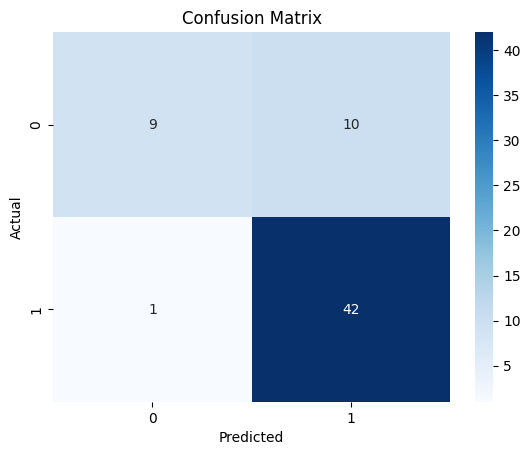

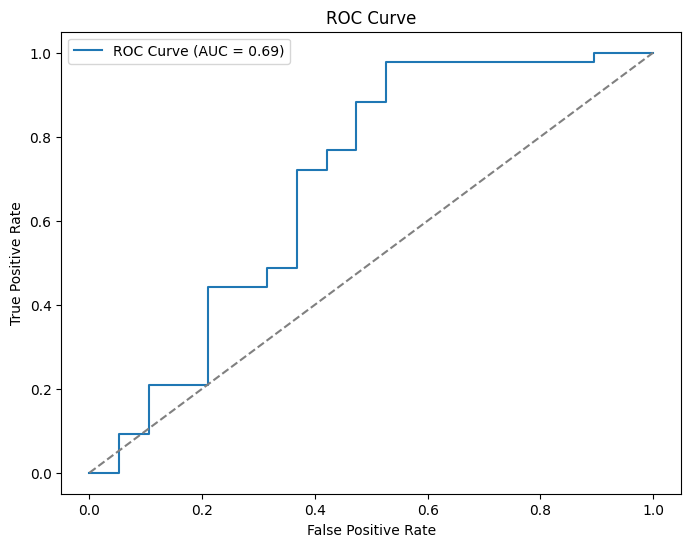

In [ ]:
# 1. Dự đoán nhãn và xác suất
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# 2. Tính các chỉ số đánh giá
print("Test Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# 3. Trực quan hóa Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 4. Vẽ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

**Conclusion:**

**Điểm mạnh:**
- Recall của lớp 1 rất cao (0.9767), đảm bảo mô hình nhận diện tốt các khoản vay đủ điều kiện.
- F1-Score và Accuracy đều tốt, phản ánh hiệu suất tổng thể của mô hình.

**Điểm yếu:**
- Lớp 0 (Not Approved) bị nhận diện kém (Recall thấp), dẫn đến số lượng False Positives cao (10 trường hợp). Điều này dẫn đến việc nhiều khoản vay không đủ điều kiện bị gán nhầm là "Approved"
- ROC-AUC thấp cho thấy mô hình vẫn chưa đủ mạnh để phân biệt rõ ràng hai lớp.

**Đề xuất giải pháp:**
- Điều chỉnh ngưỡng dự đoán: Để khắc phục số lượng False Positives cao có thể tăng ngưỡng cho mô hình dự đoán là "Approved" khi xác suất cho vay cao hơn (ví dụ từ ngưỡng phân loại mặc định là 0.5 lên 0.6)
- Thêm các đặc trưng mới (feature engineering) để mô hình hiểu rõ hơn.
- Stacking / Ensemble Models: Kết hợp nhiều mô hình để tận dụng điểm mạnh của từng mô hình


#6. Conclusion

Nhóm phát triển mô hình **Support Vector Machines (SVM)** để dự đoán khả năng khách hàng được chấp nhận khoản vay.

In [ ]:
joblib.dump(best_model, "best_model")
print(f"Best model saved as {best_model}.")


Best model saved as SVC(C=0.1, gamma=0.01, kernel='linear', probability=True, random_state=42).
